###### This notebook exemplify  matrices  mutiplication with simple matrices (with np.dot versus np.outer)

###### This notebook exemplify  matrices  mutiplication used in an equivalent layer  (with np.dot versus np.outer)

In [1]:
%matplotlib inline
import numpy as np

from matplotlib import pyplot as plt
from datetime import datetime

from fatiando.vis import mpl
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism, sphere
from fatiando.constants import G, SI2MGAL



C:\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# gz component of a point of mass located at xk, yk, zk computed at the observation point xi, yi, zi
def AZ(xi,yi,zi,xk,yk,zk):
    raio = 1.0
    volume = 1.0 
    rz = zi-zk
    rx = xi-xk
    ry = yi-yk
    r  = np.sqrt(rx**2+ry**2+rz**2)
    r3=r**3
    gz = -volume*G*rz/r3
    Az = gz*SI2MGAL
    return Az


##### Multiplications of simple matrices:

####  Testing multiplications of simple matrices: Exemples A * B

In [3]:
#  A = (na x ma)
na = 4
ma = 3
A = np.zeros(shape=(na,ma))
#print A

for i in range(na):
    A[i,:] = i + 10.
print 'A =', A

#  B = (nb x mb)
nb = ma
mb = 2 
B = np.zeros(shape=(nb, mb))
#print B

for i in range(nb):
    B[i,:] = i + 100.
print 'B =', B 


# multiplying A * B

AB = np.dot(A,B)
print 'AB =', AB

# multiplying with outter

temp1 = np.outer(A[:,0], B[0,:])
temp2 = np.outer(A[:,1], B[1,:])
temp3 = np.outer(A[:,2], B[2,:])

AB1 = temp1+temp2+temp3

print 'AB1 =', AB1

np.allclose(AB1, AB)

# multiplying with outter
AB2 = np.zeros(shape=(na,mb))

for i in range(ma):
    AB2 = np.outer(A[:,i], B[i,:]) + AB2

print 'AB2 =', AB2

A = [[ 10.  10.  10.]
 [ 11.  11.  11.]
 [ 12.  12.  12.]
 [ 13.  13.  13.]]
B = [[ 100.  100.]
 [ 101.  101.]
 [ 102.  102.]]
AB = [[ 3030.  3030.]
 [ 3333.  3333.]
 [ 3636.  3636.]
 [ 3939.  3939.]]
AB1 = [[ 3030.  3030.]
 [ 3333.  3333.]
 [ 3636.  3636.]
 [ 3939.  3939.]]
AB2 = [[ 3030.  3030.]
 [ 3333.  3333.]
 [ 3636.  3636.]
 [ 3939.  3939.]]


In [4]:
#  Testing multiplications of matrices: Exemples At* A

In [5]:
#  A = (na x ma)
na = 4
ma = 3
A = np.zeros(shape=(na,ma))

for i in range(na):
    A[i,:] = i + 10.
print 'A =', A

# transposition of A

AT = np.transpose(A)
print 'AT =', AT


# multiplying At * A

ATA = np.dot(AT,A)
print 'ATA =', ATA


# multiplying with outter
ATA1 = np.zeros(shape=(ma,ma))

for i in range(na):
    ATA1 = np.outer(A[i,:], A[i,:]) + ATA1

print 'ATA1 =', ATA1

A = [[ 10.  10.  10.]
 [ 11.  11.  11.]
 [ 12.  12.  12.]
 [ 13.  13.  13.]]
AT = [[ 10.  11.  12.  13.]
 [ 10.  11.  12.  13.]
 [ 10.  11.  12.  13.]]
ATA = [[ 534.  534.  534.]
 [ 534.  534.  534.]
 [ 534.  534.  534.]]
ATA1 = [[ 534.  534.  534.]
 [ 534.  534.  534.]
 [ 534.  534.  534.]]


In [6]:
#  Testing multiplications of a transposed matrix by a vector: Exemples At* d

In [7]:
#  A = (na x ma)
na = 4
ma = 3
A = np.zeros(shape=(na,ma))

for i in range(na):
    A[i,:] = i + 10.
print 'A =', A

# transposition of A

AT = np.transpose(A)
print 'AT =', AT

# Creating a vector
d = np.zeros(shape=(na))

for i in range(na):
    d[i] = i + 1000.
print 'd =', d

# multiplying At * d

ATd = np.dot(AT,d)
print 'ATd =', ATd


# multiplying with outter
ATd1 = np.zeros(shape=(ma))

for i in range(na):
    ATd1 = np.outer(A[i,:], d[i]) + ATd1

print 'ATd1 =', ATd1

A = [[ 10.  10.  10.]
 [ 11.  11.  11.]
 [ 12.  12.  12.]
 [ 13.  13.  13.]]
AT = [[ 10.  11.  12.  13.]
 [ 10.  11.  12.  13.]
 [ 10.  11.  12.  13.]]
d = [ 1000.  1001.  1002.  1003.]
ATd = [ 46074.  46074.  46074.]
ATd1 = [[ 46074.  46074.  46074.]
 [ 46074.  46074.  46074.]
 [ 46074.  46074.  46074.]]


In [8]:
#  A = (na x ma)
na = 4
ma = 3
A = np.zeros((na,ma),dtype =float)

for i in range(na):
    A[i,:] = i + 10.
print 'A =', A
print type(A), len(A)

# multiplying with outter
ATA2 = np.zeros((ma,ma),dtype =float)

for i in range(na):
    ATA2 = np.outer(A[i,:], A[i,:]) + ATA2

print 'ATA2 =', ATA2

A = [[ 10.  10.  10.]
 [ 11.  11.  11.]
 [ 12.  12.  12.]
 [ 13.  13.  13.]]
<type 'numpy.ndarray'> 4
ATA2 = [[ 534.  534.  534.]
 [ 534.  534.  534.]
 [ 534.  534.  534.]]


In [9]:
np.allclose(AB1, AB)


True

In [10]:
np.allclose(AB2, AB)


True

In [11]:
np.allclose(ATA1, ATA)


True

In [12]:
np.allclose(ATd1, ATd)

True

####  Matrices  mutiplication used in an equivalent layer  (with np.dot versus np.outer)

In [13]:
start_time_total = datetime.now()

N_East  = 50
N_North = 25
area   = (-1000, 1000, -500, 500)
shape_obs = (N_North,N_East)

z_dado = -150.0

xp, yp, zp = gridder.regular(area, shape_obs, z=z_dado)



In [14]:
# Number of observation points 
Npts = N_East * N_North 

print ('Number of observation points ', Npts)

('Number of observation points ', 1250)


In [15]:
# creating the equivalent Layer x and y coordinates 

xs = np.copy(xp)
ys = np.copy(yp)

#horizontal plane containing the equivalent sources located at plano_fonte 
plano_fonte=200.
zs = np.zeros_like(zp) + plano_fonte


In [16]:
# Number os equivalent sources

M_source= len(xs)

print ('Number of observation Equivalent sources  ', M_source)

('Number of observation Equivalent sources  ', 1250)


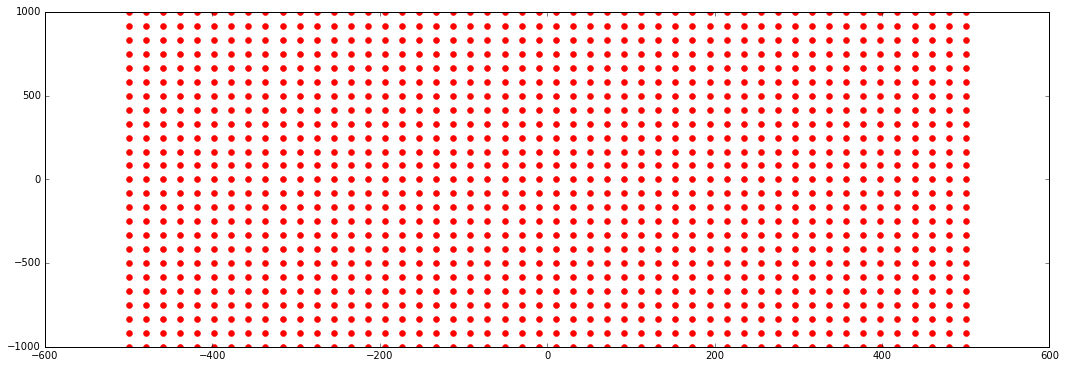

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(yp,xp, 'r.', markersize = 12)

In [18]:
# Computing the sensitivity matrix by row

start_time_G = datetime.now() 

A_GZ = np.empty((Npts,M_source),dtype = float)

for i in range(Npts):
    A_GZ[i,:] = AZ(xp[i], yp[i], zp[i], xs,ys,zs)
    
end_time_G  = datetime.now()
print('Time to set up the sensitivity matrix: {}'.format(end_time_G  - start_time_G ))  

Time_G = end_time_G  - start_time_G

Time to set up the sensitivity matrix: 0:00:00.139000


## Three different ways to create the Hessiana matrix 

In [19]:
# Classical: Computing the Hessiana matrix by using np.dot

start_time_GTG = datetime.now() 

GTG = np.empty((M_source,M_source),dtype =float)
GTG = np.dot(A_GZ.T, A_GZ)


end_time_GTG  = datetime.now()
print('Time to set up the Hessiana matrix via np.dot GTG: {}'.format(end_time_GTG  - start_time_GTG ))  

Time_GTG = end_time_GTG  - start_time_GTG

Time_1 = Time_G + Time_GTG
print ('Total time to set up G + GTG via np.dot is: {}'.format(Time_G + Time_GTG )) 

Time to set up the Hessiana matrix via np.dot GTG: 0:00:00.066000
Total time to set up G + GTG via np.dot is: 0:00:00.205000


In [20]:
# Computing the Hessiana matrix by using np.outer and with the sensitivity matrix previously computed

start_time_GTG1 = datetime.now() 

GTG1 = np.empty((M_source,M_source),dtype =float)

for i in range(Npts):
    GTG1 += np.outer(A_GZ[i,:], A_GZ[i,:]) 

end_time_GTG1  = datetime.now()
print('Time to set up the Hessiana matrix via np.outer GTG1: {}'.format(end_time_GTG1  - start_time_GTG1 ))  


Time_GTG1 = end_time_GTG1  - start_time_GTG1
Time_2 = Time_G + Time_GTG1 

print ('Total time to set up G + GTG1  via np.outer is: {}'.format(Time_G + Time_GTG1 )) 

Time to set up the Hessiana matrix via np.outer GTG1: 0:00:08.118000
Total time to set up G + GTG1  via np.outer is: 0:00:08.257000


In [21]:
np.allclose(GTG1, GTG)

True

In [22]:
# Computing THE Hessiana matrix via np.outer and WITHOUT seting up the sensitivity matrix 

start_time_GTG2 = datetime.now() 

GTG2 = np.empty((M_source,M_source),dtype =float)

for i in range(Npts):
    GTG2 += np.outer(AZ(xp[i], yp[i], zp[i], xs,ys,zs), AZ(xp[i], yp[i], zp[i], xs,ys,zs))
    
end_time_GTG2  = datetime.now()
print('Total time to set up the Hessiana matrix GTG2 via np.outer and WITHOUT the sensitivity matrix:{}'.format(end_time_GTG2  - start_time_GTG2 ))  
   
Time_3 = end_time_GTG2  - start_time_GTG2

Total time to set up the Hessiana matrix GTG2 via np.outer and WITHOUT the sensitivity matrix:0:00:08.334000


In [23]:
np.allclose(GTG2, GTG)

True